# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [4]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgba2rgb

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [6]:
#change image to gray scale
def image2Gray(image):
    grayImage = image
    #check for the image if its not grayscale
    if(len(image.shape) == 3):
        #is it rgb
        if(image.shape[2] == 3):
            grayImage = rgb2gray(image)
            print(grayImage)
        #is it rgba
        if(image.shape[2] == 4):
            imageRGB = rgba2rgb(image)
            grayImage = rgb2gray(imageRGB)
    return grayImage

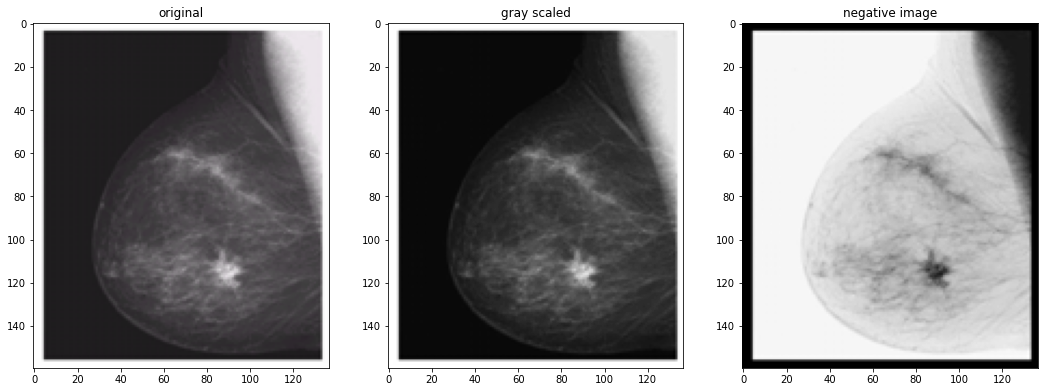

In [7]:
'''
1
Negative Transformation
'''
#This function returns a list of the image grayed and its negative
def Negative(image):
    #convert image to gray scale
    grayImage = image2Gray(image)
    #convert to negative
    negativeImage = 1 - grayImage
    return [grayImage,negativeImage]

image = io.imread('./imgs/Picture1.png')

titlearr = ['original', 'gray scaled', 'negative image']
imagearr = [image]
imagearrNegative = Negative(image)
imagearr.append(imagearrNegative[0])
imagearr.append(imagearrNegative[1])

show_images(imagearr, titlearr)
            
    

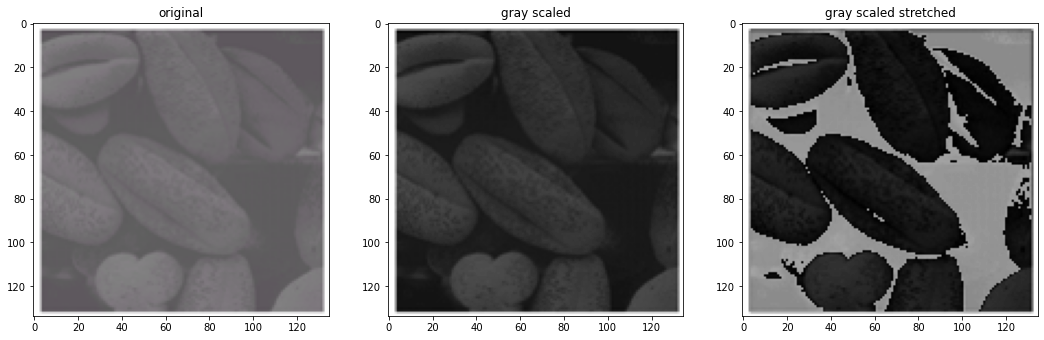

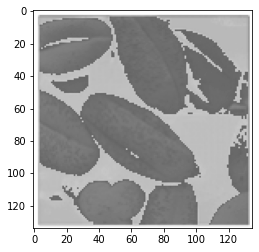

In [31]:
'''
2
Contrast Enhancement
'''
#this function Stretches the grey levels in the range 0 to 100 into the range 50 â€“ 200 and leaves other levels non changed
def Contrast_enhancement(image):
    #convert image to gray scale
    grayImage = image2Gray(image)
    grayold = grayImage.copy()
    #stretch the image
    #print(grayImage)
    #print('ddfdsfhsdajfdsjgsafd')
    grayImage[(grayImage <= (100 / 255))] = (grayImage[(grayImage <= (100 / 255))] * 1.5) + (50 / 255)
    #print(grayImage)
    return [grayold, grayImage]
    
image = io.imread('./imgs/Picture2.png')

titlearr = ['original', 'gray scaled', 'gray scaled stretched']
imagearr = [image]
imagearrstretched = Contrast_enhancement(image)
imagearr.append(imagearrstretched[0])
imagearr.append(imagearrstretched[1])

show_images(imagearr, titlearr)
plt.imshow(imagearr[2], cmap='gray', vmin=0, vmax=1)

    

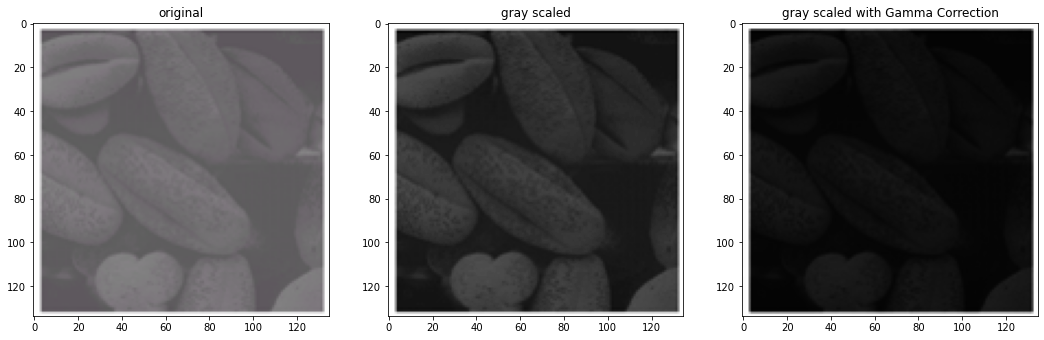

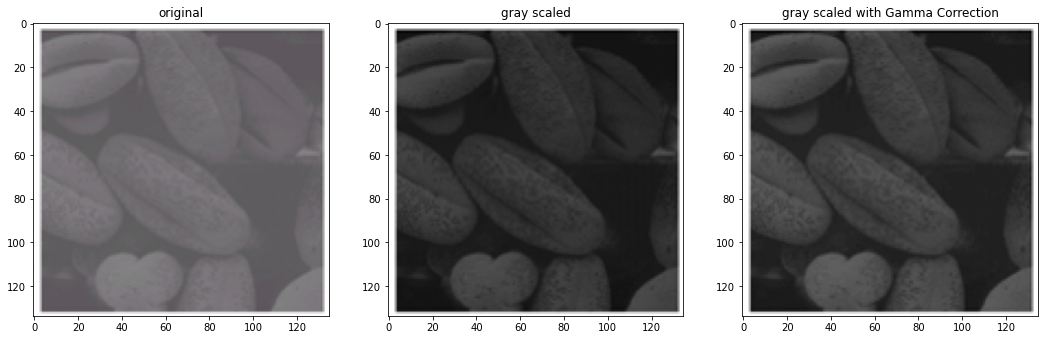

In [35]:
'''
3
Gamma Correction
'''
def Gamma_Correction(image, c, gamma):
    #convert image to gray scale
    grayImage = image2Gray(image)
    grayold = grayImage.copy()
    #change the Gamma Correction
    grayImage = c * (grayImage ** gamma)
    return [grayold, grayImage]
    
image = io.imread('./imgs/Picture2.png')

titlearr = ['original', 'gray scaled', 'gray scaled with Gamma Correction']
imagearr = [image]
#photo will be darker
imagearrCorrection = Gamma_Correction(image, 1, 3)
imagearr.append(imagearrCorrection[0])
imagearr.append(imagearrCorrection[1])
show_images(imagearr, titlearr)

#photo will be lighter
imagearr2 = [image]
imagearrCorrection2 = Gamma_Correction(image, 1, 0.5)
imagearr2.append(imagearrCorrection2[0])
imagearr2.append(imagearrCorrection2[1])
show_images(imagearr2, titlearr)

In [ ]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    #display original image and histogram
    show_images([name], ['original image'])
    showHist(name)
    #convert image to gray scale
    grayImage = image2Gray(image)
    #define arr of zeros
    arrH = np.zeros(6)
    
    
    
    
    
    
